## EDA

Goals: 
- Identify patterns and develop hypotheses.
- Test technical assumptions. Inform model selection and feature engineering.
- Build an intuition for the data.

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler

In [39]:
data = pd.read_csv('new data/merged.csv')
data.describe()

,Year,Pop,Bovine Production,Pig Production,Poultry Production,Bovine Price,Poultry Price,Pig Price,Emissions
count,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000,1.009000e+03,1.009000e+03,1.009000e+03,1009.000000
mean,2004.711596,1.302622e+05,1355.672944,2399.673935,1924.884044,4.566929e+03,5.250804e+03,2.520498e+03,108487.025988
std,7.994236,2.757916e+05,2330.840512,6932.618878,3731.351043,1.430079e+05,1.645819e+05,7.779273e+04,167636.440417
min,1991.000000,3.446170e+03,18.000000,0.000000,61.000000,0.000000e+00,0.000000e+00,0.000000e+00,6399.583600
25%,1998.000000,2.185327e+04,238.000000,282.000000,433.000000,3.785000e+01,4.873000e+01,4.586000e+01,24080.045100
50%,2005.000000,4.669286e+04,508.000000,704.000000,881.000000,6.692000e+01,7.521000e+01,7.773000e+01,47156.045900
75%,2012.000000,9.554596e+04,1400.000000,1725.000000,1414.000000,9.187000e+01,9.558000e+01,9.735000e+01,87564.535100
max,2018.000000,1.427648e+06,12427.000000,56714.000000,22298.000000,4.542676e+06,5.227973e+06,2.471139e+06,757149.435700


### Data Observations
We have a huge skew in our price data, which is surpising given the lower values we saw when wrangling data. Let's see if this is being caused by one row in particular.

In [45]:
data['Pig Price'].sort_values(ascending=False)

980    2471138.69
27         206.70
829        196.68
825        185.89
824        177.45
          ...    
957          0.15
875          0.13
123          0.03
764          0.03
122          0.00
Name: Pig Price, Length: 1009, dtype: float64

In [46]:
data['Bovine Price'].sort_values(ascending=False)

980    4542676.29
586        244.30
585        231.58
583        222.09
582        212.17
          ...    
876          0.10
875          0.09
764          0.03
123          0.01
122          0.00
Name: Bovine Price, Length: 1009, dtype: float64

In [47]:
data['Poultry Price'].sort_values(ascending=False)

980    5227972.94
27         264.13
26         150.41
927        149.99
902        147.52
          ...    
875          0.21
957          0.20
764          0.04
123          0.02
122          0.00
Name: Poultry Price, Length: 1009, dtype: float64

In [54]:
data.drop(labels=980,axis=0, inplace=True)

In [57]:
#Lastly, let's scale down our population data so it's more manageable to work with
data.Pop = data.Pop/1000

In [58]:
data.describe()

,Year,Pop,Bovine Production,Pig Production,Poultry Production,Bovine Price,Poultry Price,Pig Price,Emissions
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000
mean,2004.698413,130.362740,1356.583333,2401.931548,1926.349206,64.836488,69.531994,71.471994,108554.685763
std,7.987224,275.909985,2331.818056,6935.689138,3732.912888,37.753722,32.689220,35.987026,167705.870955
min,1991.000000,3.446170,18.000000,0.000000,61.000000,0.000000,0.000000,0.000000,6399.583600
25%,1998.000000,21.827668,237.500000,282.750000,433.000000,37.845000,48.530000,45.795000,24067.728825
50%,2005.000000,46.706027,508.000000,707.000000,882.500000,66.640000,75.165000,77.665000,47164.678850
75%,2012.000000,95.551984,1402.000000,1726.500000,1414.750000,91.787500,95.572500,97.245000,87601.874000
max,2018.000000,1427.647786,12427.000000,56714.000000,22298.000000,244.300000,264.130000,206.700000,757149.435700


## Skewed data
We can see there's a lot of variation in the maximum and 75th percentile for much of our data. Let's unspect the populations and meat production values to understand if this is being caused by one cuntry.

In [59]:
data.groupby(by='Area').agg({'Pop':np.max}).sort_values('Pop',ascending=False)[:8]

,Pop
Area,
"China, mainland",1427.647786
India,1352.642280
United States of America,327.096265
Indonesia,267.670543
Brazil,209.469323
Nigeria,195.874683
Russian Federation,148.373580
Japan,128.555189


### Production Means

In [60]:
#By country
country_production_means = data.groupby('Area')[['Bovine Production','Poultry Production','Pig Production']].mean().sort_values('Bovine Production',ascending=False)
country_production_means[:10]

,Bovine Production,Poultry Production,Pig Production
Area,,,
United States of America,11658.607143,17546.714286,9442.500000
Brazil,7665.178571,8435.178571,2719.071429
"China, mainland",5029.678571,12948.178571,40810.964286
Argentina,2797.500000,1269.892857,277.714286
India,2367.285714,1651.071429,408.107143
Australia,2073.321429,799.214286,363.714286
Russian Federation,2043.074074,2023.148148,2203.370370
France,1581.214286,1898.750000,2178.750000
Mexico,1575.107143,2205.250000,1101.142857


In [74]:
#By year
year_production_means = data.groupby('Year')[['Bovine Production','Poultry Production','Pig Production']].mean().sort_values('Year')
year_production_means[:10]

,Bovine Production,Poultry Production,Pig Production
Year,,,
1991,1183.937500,1023.062500,1725.468750
1992,1258.272727,1106.636364,1830.727273
1993,1224.088235,1158.970588,1851.352941
1994,1249.771429,1203.914286,1895.714286
1995,1266.200000,1300.057143,1915.542857
1996,1294.428571,1331.428571,1920.142857
1997,1305.371429,1412.828571,1949.628571
1998,1299.628571,1484.714286,2085.142857
1999,1329.257143,1558.657143,2127.285714


### Price Means

In [75]:
#By country
country_price_means = data.groupby('Area')[['Bovine Price','Poultry Price','Pig Price']].mean().sort_values('Bovine Price',ascending=False)
country_price_means[:10]

,Bovine Price,Poultry Price,Pig Price
Area,,,
Netherlands,150.971071,86.823214,97.906071
Spain,91.173929,79.167500,132.378214
Australia,87.952143,103.192857,89.747500
Italy,87.462143,78.787500,79.469286
Belgium,87.174737,92.922105,108.760526
Germany,86.076786,94.977143,95.367500
Austria,84.630000,89.074286,100.746429
France,83.032500,84.979286,97.527857
Denmark,80.441429,81.971429,98.040357


In [85]:
#By year
year_price_means = data.groupby('Year')[['Bovine Price','Poultry Price','Pig Price']].mean().sort_values('Year')
year_price_means[:10]

,Bovine Price,Poultry Price,Pig Price
Year,,,
1991,37.360937,44.841563,49.383750
1992,37.955758,43.696667,48.725152
1993,39.673824,44.683529,44.404118
1994,39.879714,46.079714,46.171429
1995,40.755429,45.075143,49.860000
1996,39.568571,49.282000,55.560571
1997,40.729143,50.794571,59.202000
1998,43.115714,52.218000,50.415714
1999,43.336000,49.542857,47.281714


## Visualizing YoY and per Country Price and Production
We will look at the distribution of avg meat price and production, first year over year then country by country. The questions we are looking to answer are:
- Are prices/production values distributed evenly across countries?
- Are there patterns with how price/prod changes over time?
- Is there a consistent relationship and correlation between price and prod?

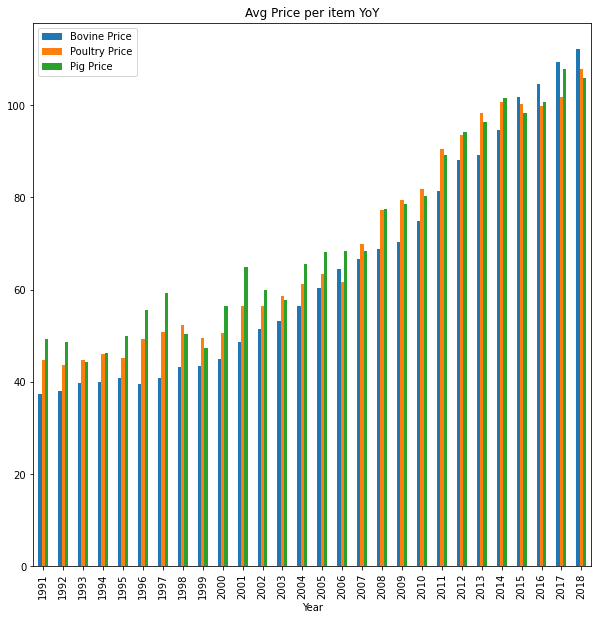

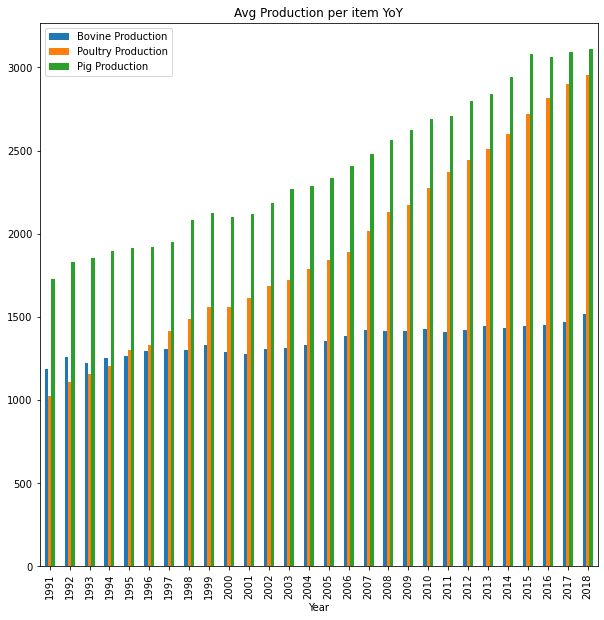

In [77]:
_=(year_price_means.reindex(index=year_price_means.mean(axis=1)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Avg Price per item YoY'))
_=plt.legend(loc='upper left')

_=(year_production_means.reindex(index=year_production_means.mean(axis=1)
    .index)
    .plot(kind='bar', figsize=(10, 10), title='Avg Production per item YoY'))
_=plt.legend(loc='upper left')

### Visualizing Price and Production by country

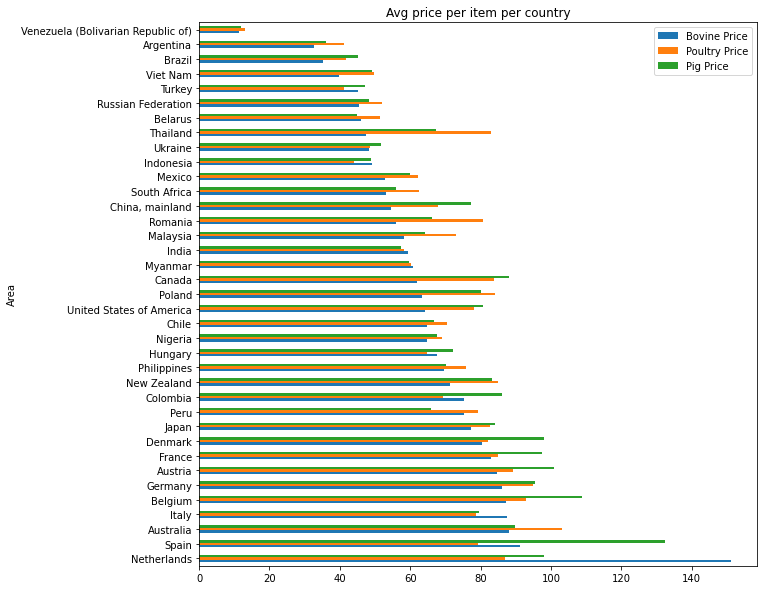

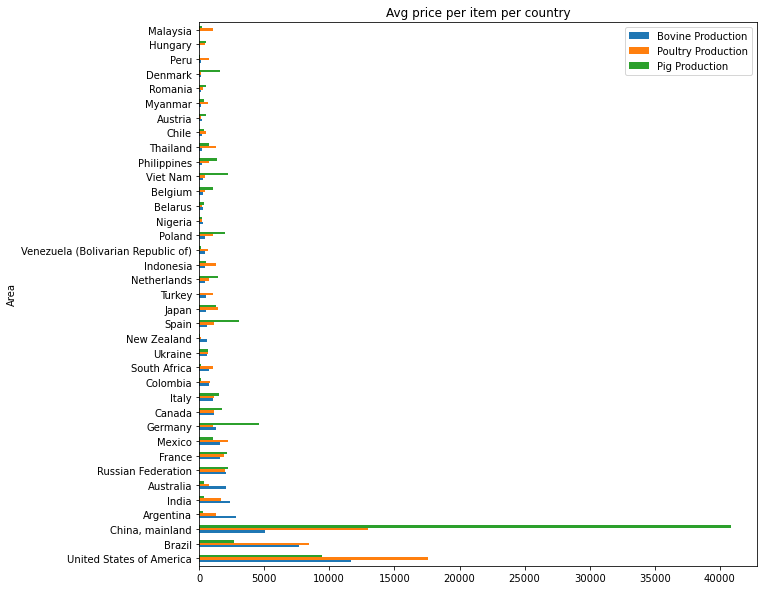

In [65]:
_=(country_price_means.reindex(index=country_price_means.mean(axis=1)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Avg price per item per country'))
_=plt.legend(loc='upper right')

_=(country_production_means.reindex(index=country_production_means.mean(axis=1)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Avg price per item per country'))
_=plt.legend(loc='upper right')

## Inpsecting Relationships

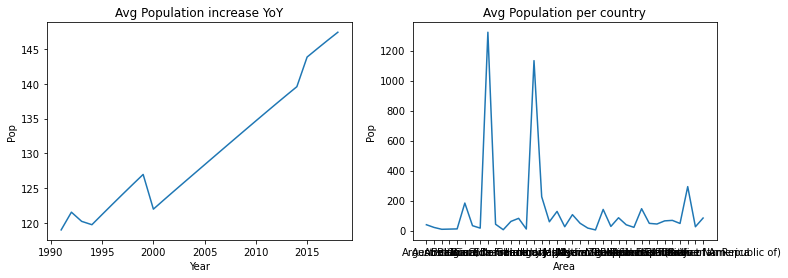

In [106]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

_=ax[0].plot(data.Year.unique(), data.groupby('Year')['Pop'].mean().values)
#Give the plot a helpful title of 'Region'
_=ax[0].set_ylabel('Pop')
#Label the xaxis 'Count'
_=ax[0].set_xlabel('Year')
_=ax[0].set_title('Avg Population increase YoY')

_=ax[1].plot(data.Area.unique(), data.groupby('Area')['Pop'].mean().values)
#Give the plot a helpful title of 'Region'
_=ax[1].set_ylabel('Pop')
#Label the xaxis 'Count'
_=ax[1].set_xlabel('Area')
_=ax[1].set_title('Avg Population per country')

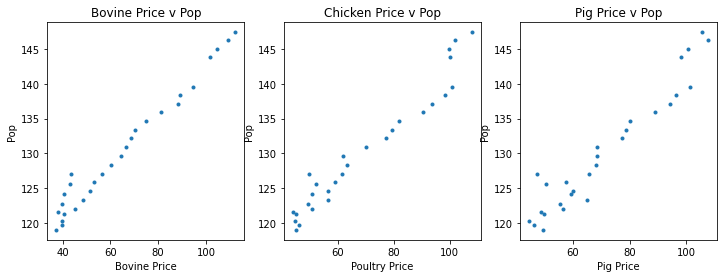

In [105]:
fig, ax = plt.subplots(1,3, figsize=(12,4))


_=ax[0].plot(data.groupby('Year')['Bovine Price'].mean().values, data.groupby('Year')['Pop'].mean().values, marker='.', linestyle='none')
#Give the plot a helpful title of 'Region'
_=ax[0].set_ylabel('Pop')
#Label the xaxis 'Count'
_=ax[0].set_xlabel('Bovine Price')
_=ax[0].set_title('Bovine Price v Pop')

_=ax[1].plot(data.groupby('Year')['Poultry Price'].mean().values, data.groupby('Year')['Pop'].mean().values, marker='.', linestyle='none')
#Give the plot a helpful title of 'Region'
_=ax[1].set_ylabel('Pop')
#Label the xaxis 'Count'
_=ax[1].set_xlabel('Poultry Price')
_=ax[1].set_title('Chicken Price v Pop')

_=ax[2].plot(data.groupby('Year')['Pig Price'].mean().values, data.groupby('Year')['Pop'].mean().values, marker='.', linestyle='none')
#Give the plot a helpful title of 'Region'
_=ax[2].set_ylabel('Pop')
#Label the xaxis 'Count'
_=ax[2].set_xlabel('Pig Price')
_=ax[2].set_title('Pig Price v Pop')

In [124]:
##IS there a faster way to do this for each pair of relationships?

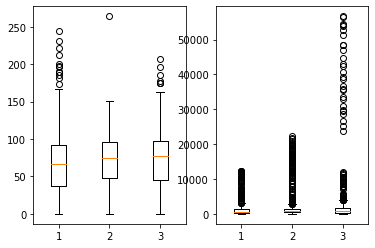

In [123]:
price_cols = [data['Bovine Price'], data['Poultry Price'],data['Pig Price']]
prod_cols = [data['Bovine Production'], data['Poultry Production'],data['Pig Production']]

fig, ax = plt.subplots(1,2)
_=ax[0].boxplot(price_cols)
_=ax[1].boxplot(prod_cols)

In [130]:
data.groupby('Area').mean().head()

,Year,Pop,Bovine Production,Pig Production,Poultry Production,Bovine Price,Poultry Price,Pig Price,Emissions
Area,,,,,,,,,
Argentina,2004.5,38.706035,2797.500000,277.714286,1269.892857,32.715357,41.217143,36.042857,128143.167111
Australia,2004.5,20.566410,2073.321429,363.714286,799.214286,87.952143,103.192857,89.747500,171175.706514
Austria,2004.5,8.268261,218.392857,518.428571,119.392857,84.630000,89.074286,100.746429,8321.585300
Belarus,2009.0,9.529811,279.210526,365.315789,253.578947,45.995789,51.290526,44.994211,20436.933305
Belgium,2009.0,10.859221,275.736842,1070.105263,429.789474,87.174737,92.922105,108.760526,10231.387647


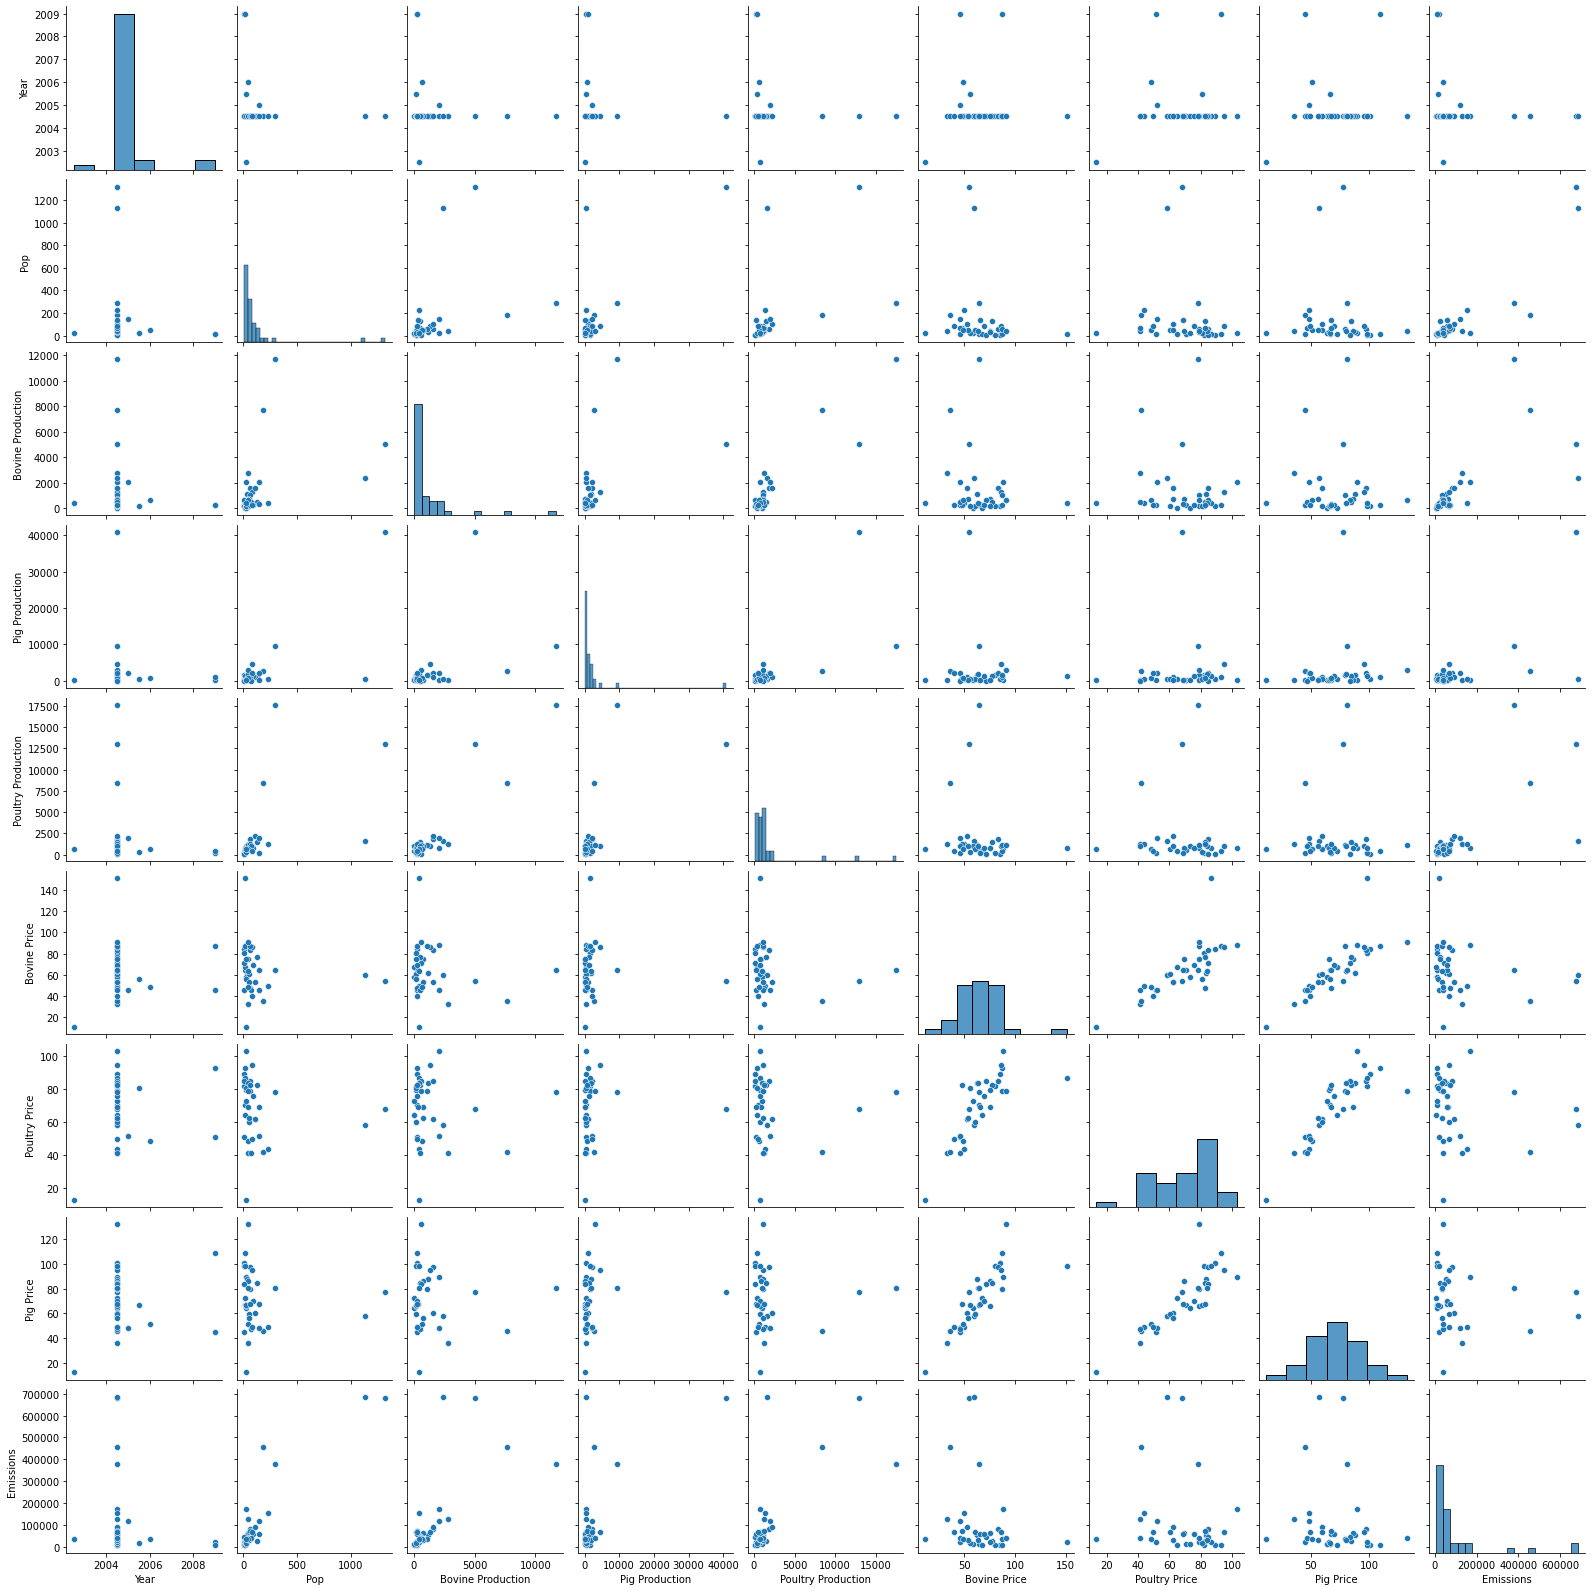

In [132]:
_=sns.pairplot(data.groupby('Area').mean())

## Observations
We can see here are many outliers in our data in the pairplot and in our groupby clauses. This makes sense since we have 57 distinct countries with different characteristics.

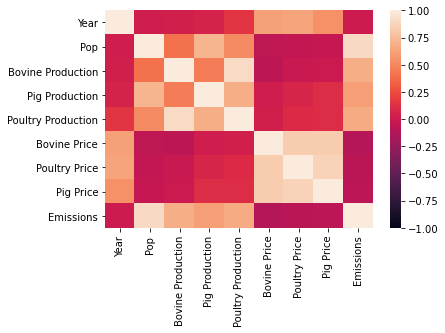

In [71]:
_=sns.heatmap(data.corr(),vmin=-1)

## Observations
- Meat price & consumption are moderately correlated (~.5), this is not too surprising but the variance may be interesting to explore further
- Population and Emissions don't appear very correlated with price, but they do with production. This makes sense intuitively and will be interesting to explore this relationship further
- Pop looks surprisingly less correlated with Bovine than other meats

### would like to find rate of increase relative to population increase

6. Interesting to know any hidden pattern with increase / decrease in employment vs price per Item category
7. Interesting to know any hidden pattern with increase / decrease in population vs proce per item category
8. Check the Predictive Power score and plot between dependent and independent variable
9. If the features are not normally distributed use shipiro-wilconx test for normality
10. Can we use any scaling procedures to make the data normally distributed

Hypothesis:

Impact of production on price

Impact of population on production

Impact of jobs on production

In [ ]:
scaler = MinMaxScaler()
#data.loc[:,'Meat, cattle':] = scaler.fit_transform(data.loc[:,'Meat, cattle':])